# Power dependent $g^{(2)}(0)$ plots showing long and short time delays

In [ ]:
!sudo apt-get install -y texlive-latex-extra texlive-fonts-recommended cm-super dvipng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0
  libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0
  libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pfb2t1c2pfb
  poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils tex-common
  tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x
  libavalon-framework-java l

In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd

In [ ]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"]
})
# plt.rcParams.update({
#     "text.usetex": False,
#     "font.family": "serif",
#     "font.serif": ["DejaVu Serif"],  # Or ["Times New Roman"] if it works for you
# })


# Importing data

In [ ]:
# Low power g2(0): Use binsize_100_bins_100000
uploaded = files.upload()
data_file_path_low_power_g2 = list(uploaded.keys())[0]
print(data_file_path_low_power_g2)

Saving 0-2mW_binsize_100_bins_100000.txt to 0-2mW_binsize_100_bins_100000.txt
0-2mW_binsize_100_bins_100000.txt


In [ ]:
# Middle power g2(0): Use binsize_100_bins_100000
uploaded = files.upload()
data_file_path_middle_power_g2 = list(uploaded.keys())[0]
print(data_file_path_middle_power_g2)

Saving 5-3mW_binsize_100_bins_100000.txt to 5-3mW_binsize_100_bins_100000.txt
5-3mW_binsize_100_bins_100000.txt


In [ ]:
# High power g2(0): Use binsize_100_bins_100000
uploaded = files.upload()
data_file_path_high_power_g2 = list(uploaded.keys())[0]
print(data_file_path_high_power_g2)

Saving 13-6mW_binsize_100_bins_100000.txt to 13-6mW_binsize_100_bins_100000.txt
13-6mW_binsize_100_bins_100000.txt


# Loading in Data and Plot


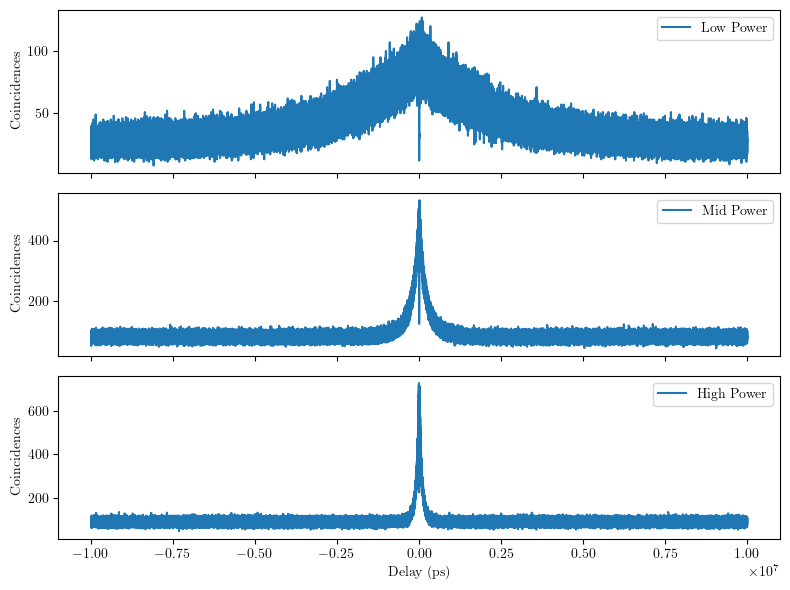

In [ ]:
# Loading in data (they all share the same delay)
LowPower_data = np.loadtxt(data_file_path_low_power_g2, delimiter='\t',skiprows=4)
LowPower_delay, LowPower_coinc = LowPower_data[:,0], LowPower_data[:,1]

MidPower_data = np.loadtxt(data_file_path_middle_power_g2, delimiter='\t',skiprows=4)
MidPower_delay, MidPower_coinc = MidPower_data[:,0], MidPower_data[:,1]

HighPower_data = np.loadtxt(data_file_path_high_power_g2, delimiter='\t',skiprows=4)
HighPower_delay, HighPower_coinc = HighPower_data[:,0], HighPower_data[:,1]

# Create figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8, 6))

# Low Power
ax1.plot(LowPower_delay, LowPower_coinc, label='Low Power')
ax1.set_ylabel('Coincidences')
ax1.legend()

# Mid Power
ax2.plot(MidPower_delay, MidPower_coinc, label='Mid Power')
ax2.set_ylabel('Coincidences')
ax2.legend()

# High Power
ax3.plot(HighPower_delay, HighPower_coinc, label='High Power')
ax3.set_ylabel('Coincidences')
ax3.set_xlabel('Delay (ps)')
ax3.legend()

# Improve layout
plt.tight_layout()
plt.show()

# Centering and Fitting


In [ ]:
# Defining fit functiond
def bi_exp(x,A, B, C, t0, t1):
    return A + B*np.exp(-np.abs(x/t0)) + C*np.exp(-np.abs(x/t1))

def one_exp_delayed_unnormalized(x,A, x0, t0, B):
    return B + A*np.exp(-np.abs((x-x0)/t0))

Optimal Param: [ -80.75040713  508.69492623 3043.24039087   93.661303  ]
Optimal Param: [-393.11385242  528.75129642 1997.70026809  479.32685068]
Optimal Param: [-528.10660109  554.86975353 1404.9513299   676.39593696]


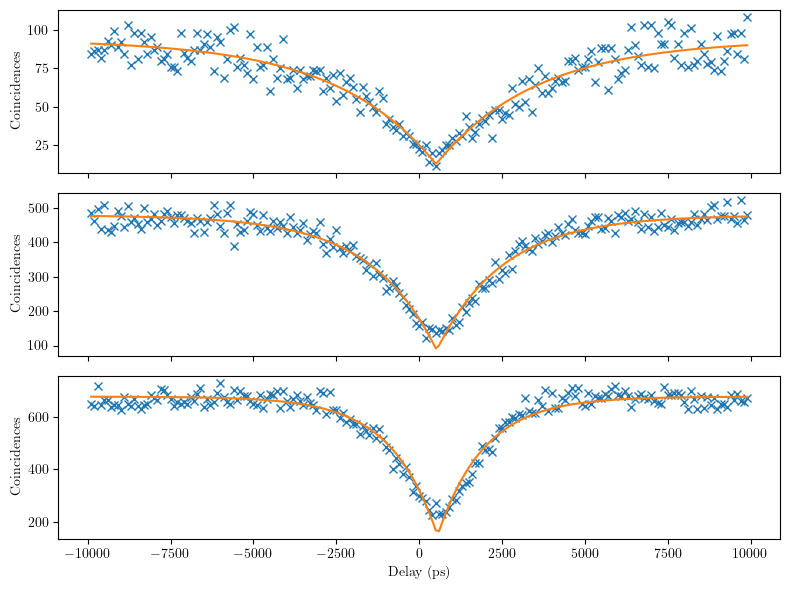

In [ ]:
# Centering all data points around 0 time delay

# Truncating the data to central dip
center_range = np.array([-10, 10]) * 1e3 # range of central dip in ps
narrow_delay = []
LowPower_narrow_coinc = []
MidPower_narrow_coinc = []
HighPower_narrow_coinc = []
for i, delay_time in enumerate(LowPower_delay): # At this point they all share the same delay data points
  if delay_time > center_range[0] and delay_time < center_range[1]:
    LowPower_narrow_coinc.append(LowPower_coinc[i])
    MidPower_narrow_coinc.append(MidPower_coinc[i])
    HighPower_narrow_coinc.append(HighPower_coinc[i])
    narrow_delay.append(delay_time)

# Fitting with unormalised, uncentered g2(0) to find zero time delay
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(8, 6))
zero_time_delays = []
for j, data in enumerate((LowPower_narrow_coinc, MidPower_narrow_coinc, HighPower_narrow_coinc)):
  popt, cov = optimize.curve_fit(one_exp_delayed_unnormalized, narrow_delay, data, bounds = ([-600, 0, 0, 0], [0, np.inf, np.inf, np.inf]),
                                 p0=[-1, narrow_delay[np.argmin(data)], 2000, max(data)], maxfev = 1e6) # A, xo, t1, B
  print('Optimal Param:', popt)
  zero_time_delays.append(abs(popt[1]))
  ax[j].plot(narrow_delay, data,'x')
  ax[j].plot(narrow_delay, one_exp_delayed_unnormalized(narrow_delay, *popt))
  ax[j].set_ylabel('Coincidences')

ax[2].set_xlabel('Delay (ps)')
plt.tight_layout()
plt.show()

# Centering each delay around the zero_time delay
for k, time_delay in enumerate(zero_time_delays):
  if k == 0:
    LowPower_corrected_delay = LowPower_delay - time_delay
  elif k == 1:
    MidPower_corrected_delay = MidPower_delay - time_delay
  elif k == 2:
    HighPower_corrected_delay = HighPower_delay - time_delay

Power: 4.76 $P^{cw}_{\mathrm{Sat}}$ Popt: [   89.11121924  -528.03199775   587.7050358   1309.82680725
 81815.29511492]
Power: 4.76 $P^{cw}_{\mathrm{Sat}}$ Error: 161.8392833304752
Power: 1.85 $P^{cw}_{\mathrm{Sat}}$ Popt: [ 7.84694848e+01 -3.59991540e+02  3.58000353e+02  1.48692067e+03
  2.34393049e+05]
Power: 1.85 $P^{cw}_{\mathrm{Sat}}$ Error: 385.5347297223704
Power: 0.07 $P^{cw}_{\mathrm{Sat}}$ Popt: [ 2.47260922e+01 -7.72725902e+01  6.48085824e+01  2.77911651e+03
  2.27804401e+06]
Power: 0.07 $P^{cw}_{\mathrm{Sat}}$ Error: 5364.22756480513


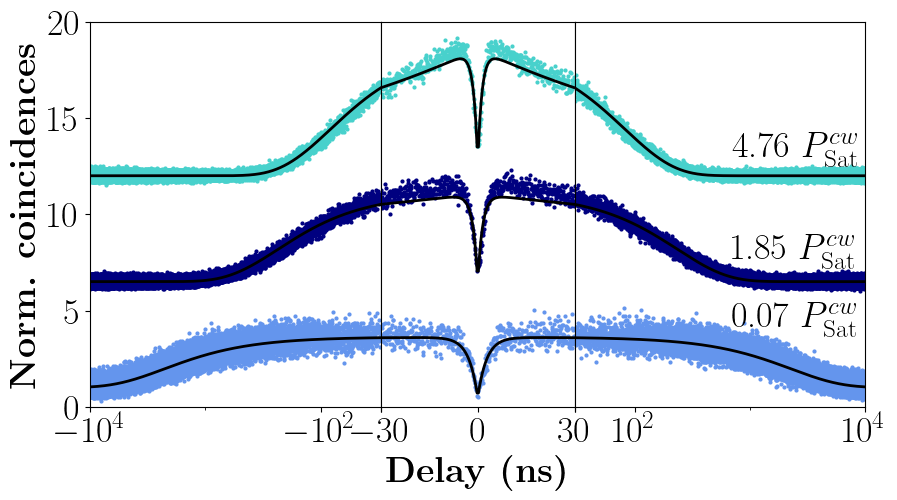

In [ ]:

# Data arrays
delays = [HighPower_corrected_delay, MidPower_corrected_delay,LowPower_corrected_delay]
coincidences = [HighPower_coinc, MidPower_coinc, LowPower_coinc]
titles = [r'4.76 $P^{cw}_{\mathrm{Sat}}$', '1.85 $P^{cw}_{\mathrm{Sat}}$', r'0.07 $P^{cw}_{\mathrm{Sat}}$' ]

# Create figure and 3x3 subplots
fig, axes = plt.subplots(
    1, 3, figsize=(10, 5),
    gridspec_kw={'width_ratios': [1.5, 1, 1.5], 'hspace': 0.2, 'wspace': 0.0},
    sharex='col', sharey='row',
    dpi=100
)
# Plotting params
font_size = 26
line_width = 1
colours = ['mediumturquoise','navy' ,'cornflowerblue' ]
linear_range_ps = 3e4  # linear region in ps
linear_range_ns = linear_range_ps / 1e3  # convert to ns for plotting
min_max_delay_ps = 10e6 # Min-max range of plot
min_max_delay_ns = min_max_delay_ps / 1e3
height_scale = 5.5


# Plotting loop
for i in range(3):
    delay_ps = delays[i]                   # delay for fitting (in ps)
    delay_ns = delay_ps / 1e3              # delay for plotting (in ns)
    coinc = coincidences[i]
    ax_left, ax_center, ax_right = axes

    # Fit full data range
    guess = [np.mean(coinc[:100]), -100, 100, 5_000, 5_000] # A, B, C, t0, t1
    bounds = ([0, -np.inf, 0, 0, 0], [1000, 0, np.inf, 5_000, 10_000_000])
    popt, erropt = optimize.curve_fit(bi_exp, delay_ps, coinc, p0=guess, bounds=bounds, maxfev=1e5, sigma = np.sqrt(coinc))
    print('Power:', titles[i],'Popt:', popt)
    print('Power:', titles[i],'Error:', np.sqrt(erropt[-1][-1]))

    # Normalize
    A_norm = popt[0]
    coinc_norm = coinc / A_norm

    # Masks for plotting in ns
    mask_left = delay_ns < -linear_range_ns
    mask_center = (delay_ns >= -linear_range_ns) & (delay_ns <= linear_range_ns)
    mask_right = delay_ns > linear_range_ns

    # Changing y-axis range
    ax_left.set_ylim(0, 20)
    ax_right.set_ylim(0, 20)
    ax_center.set_ylim(0, 20)

    # Left (log)
    ax_left.plot(delay_ns[mask_left], coinc_norm[mask_left]+height_scale*(2-i), 'o', c=colours[i], ms=2)
    ax_left.set_xscale('symlog', linthresh=1e4 / 1e3)
    ax_left.set_xlim(-min_max_delay_ns, -linear_range_ns)
    ax_left.set_xticks([-min_max_delay_ns, -1e5 / 1e3, -linear_range_ns])
    ax_left.tick_params(labelsize=font_size)
    if i == 1:
        ax_left.set_ylabel(r'\textbf{Norm. coincidences}', fontsize=font_size)

    # Center (linear)
    ax_center.plot(delay_ns[mask_center], coinc_norm[mask_center]+height_scale*(2-i), 'o', c=colours[i], ms=2)
    ax_center.set_xlim(-linear_range_ns, linear_range_ns)
    ax_center.set_xticks([-linear_range_ns, 0, linear_range_ns])
    if i == 2:
        ax_center.set_xlabel(r"\textbf{Delay (ns)}", fontsize=font_size)
    ax_center.tick_params(left=False, labelleft=False, labelsize=font_size)

    # Right (log)
    ax_right.plot(delay_ns[mask_right], coinc_norm[mask_right]+height_scale*(2-i), 'o', c=colours[i], ms=2)
    ax_right.set_xscale('symlog', linthresh=1e4 / 1e3)
    ax_right.set_xlim(linear_range_ns, min_max_delay_ns)
    ax_right.set_xticks([linear_range_ns, 1e5 / 1e3, min_max_delay_ns])
    ax_right.tick_params(left=False, labelleft=False, labelsize=font_size)
    if i == 0:
       ax_right.text(7e2,2+height_scale*(2-i),titles[i], fontsize = font_size)
    if i == 1:
       ax_right.text(7e2,2.2+height_scale*(2-i),titles[i], fontsize = font_size)
    if i == 2:
       ax_right.text(7e2,4.2+height_scale*(2-i),titles[i], fontsize = font_size)

    # Hide x tick labels for upper rows
    #if i < 2:
        #for ax in (ax_left, ax_center, ax_right):
            #ax.tick_params(labelbottom=False)

    # Generate fit curve (ps for fitting, convert to ns for plotting)
    delay_fit_ps = np.linspace(-min_max_delay_ps, min_max_delay_ps, 50000)
    delay_fit_ns = delay_fit_ps / 1e3
    coinc_fit = bi_exp(delay_fit_ps, *popt) / A_norm

    # Fit masks in ns
    mask_fit_left = delay_fit_ns < -linear_range_ns
    mask_fit_center = (delay_fit_ns >= -linear_range_ns) & (delay_fit_ns <= linear_range_ns)
    mask_fit_right = delay_fit_ns > linear_range_ns

    # Plot fit curves
    ax_left.plot(delay_fit_ns[mask_fit_left], coinc_fit[mask_fit_left]+height_scale*(2-i), '-k', linewidth=2)
    ax_center.plot(delay_fit_ns[mask_fit_center], coinc_fit[mask_fit_center]+height_scale*(2-i), '-k', linewidth=2)
    ax_right.plot(delay_fit_ns[mask_fit_right], coinc_fit[mask_fit_right]+height_scale*(2-i), '-k', linewidth=2)

plt.show()

#Pulsed G2

In [ ]:
# pulsed g2
uploaded = files.upload()
data_file_path_pulsed_g2 = list(uploaded.keys())[0]
print(data_file_path_pulsed_g2)

Saving Pulsedg2.txt to Pulsedg2.txt
Pulsedg2.txt


In [ ]:
DATA = np.loadtxt(data_file_path_pulsed_g2, delimiter='\t',skiprows=4)
df = pd.DataFrame(DATA, columns=["Delay", "Correlated events"])
print(df.head())

delayp = df.iloc[:,0]
correlationsp = df.iloc[:,1]

        Delay  Correlated events
0 -20000000.0               37.0
1 -19999900.0               36.0
2 -19999800.0               46.0
3 -19999700.0               46.0
4 -19999600.0               49.0


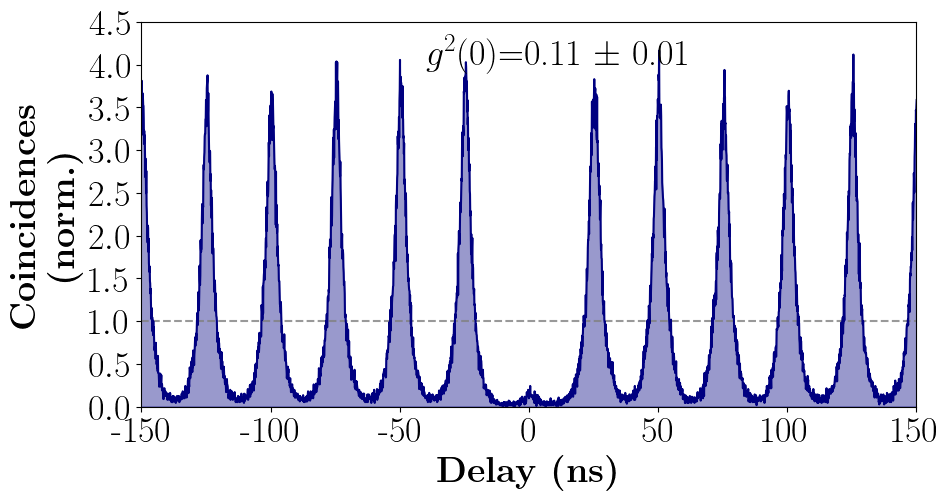

In [ ]:
colour = 'navy'
shade = 'navy'

plt.figure(figsize=(10,5))
plt.axhline(1, linestyle='--', c = "grey", alpha = 0.8)
plt.plot(delayp, correlationsp/111, '-', c=colour, ms=2)
plt.fill_between(delayp, correlationsp/111, color=shade, alpha=0.4)  # Alpha controls transparency
plt.text(-40000, 4, r'$g^{2}(0) $' + f'={0.11} $\pm$ {0.01}',fontsize=font_size)
plt.xlabel(r'\textbf{Delay (ns)}', fontsize=font_size) # Changed label to ns
plt.ylabel(r'\textbf{Coincidences}' + '\n' + r'\textbf{(norm.)}', fontsize=font_size)
plt.ylim(0,4.5)
plt.xlim(-142000,142000)
plt.xticks(fontsize = font_size)
plt.yticks(fontsize = font_size)

#Change x-axis ticks to nanoseconds
plt.xticks(plt.xticks()[0], [round(x / 1000) for x in plt.xticks()[0]])

plt.show()

# Join the Graph on top of each other

Power: 4.76 t1: 1309.8268072549126 Error: 30.89427988998766
Power: 1.85 t1: 1486.920671680156 Error: 37.70960242524795
Power: 0.07 t1: 2779.11650740777 Error: 101.33521845961566


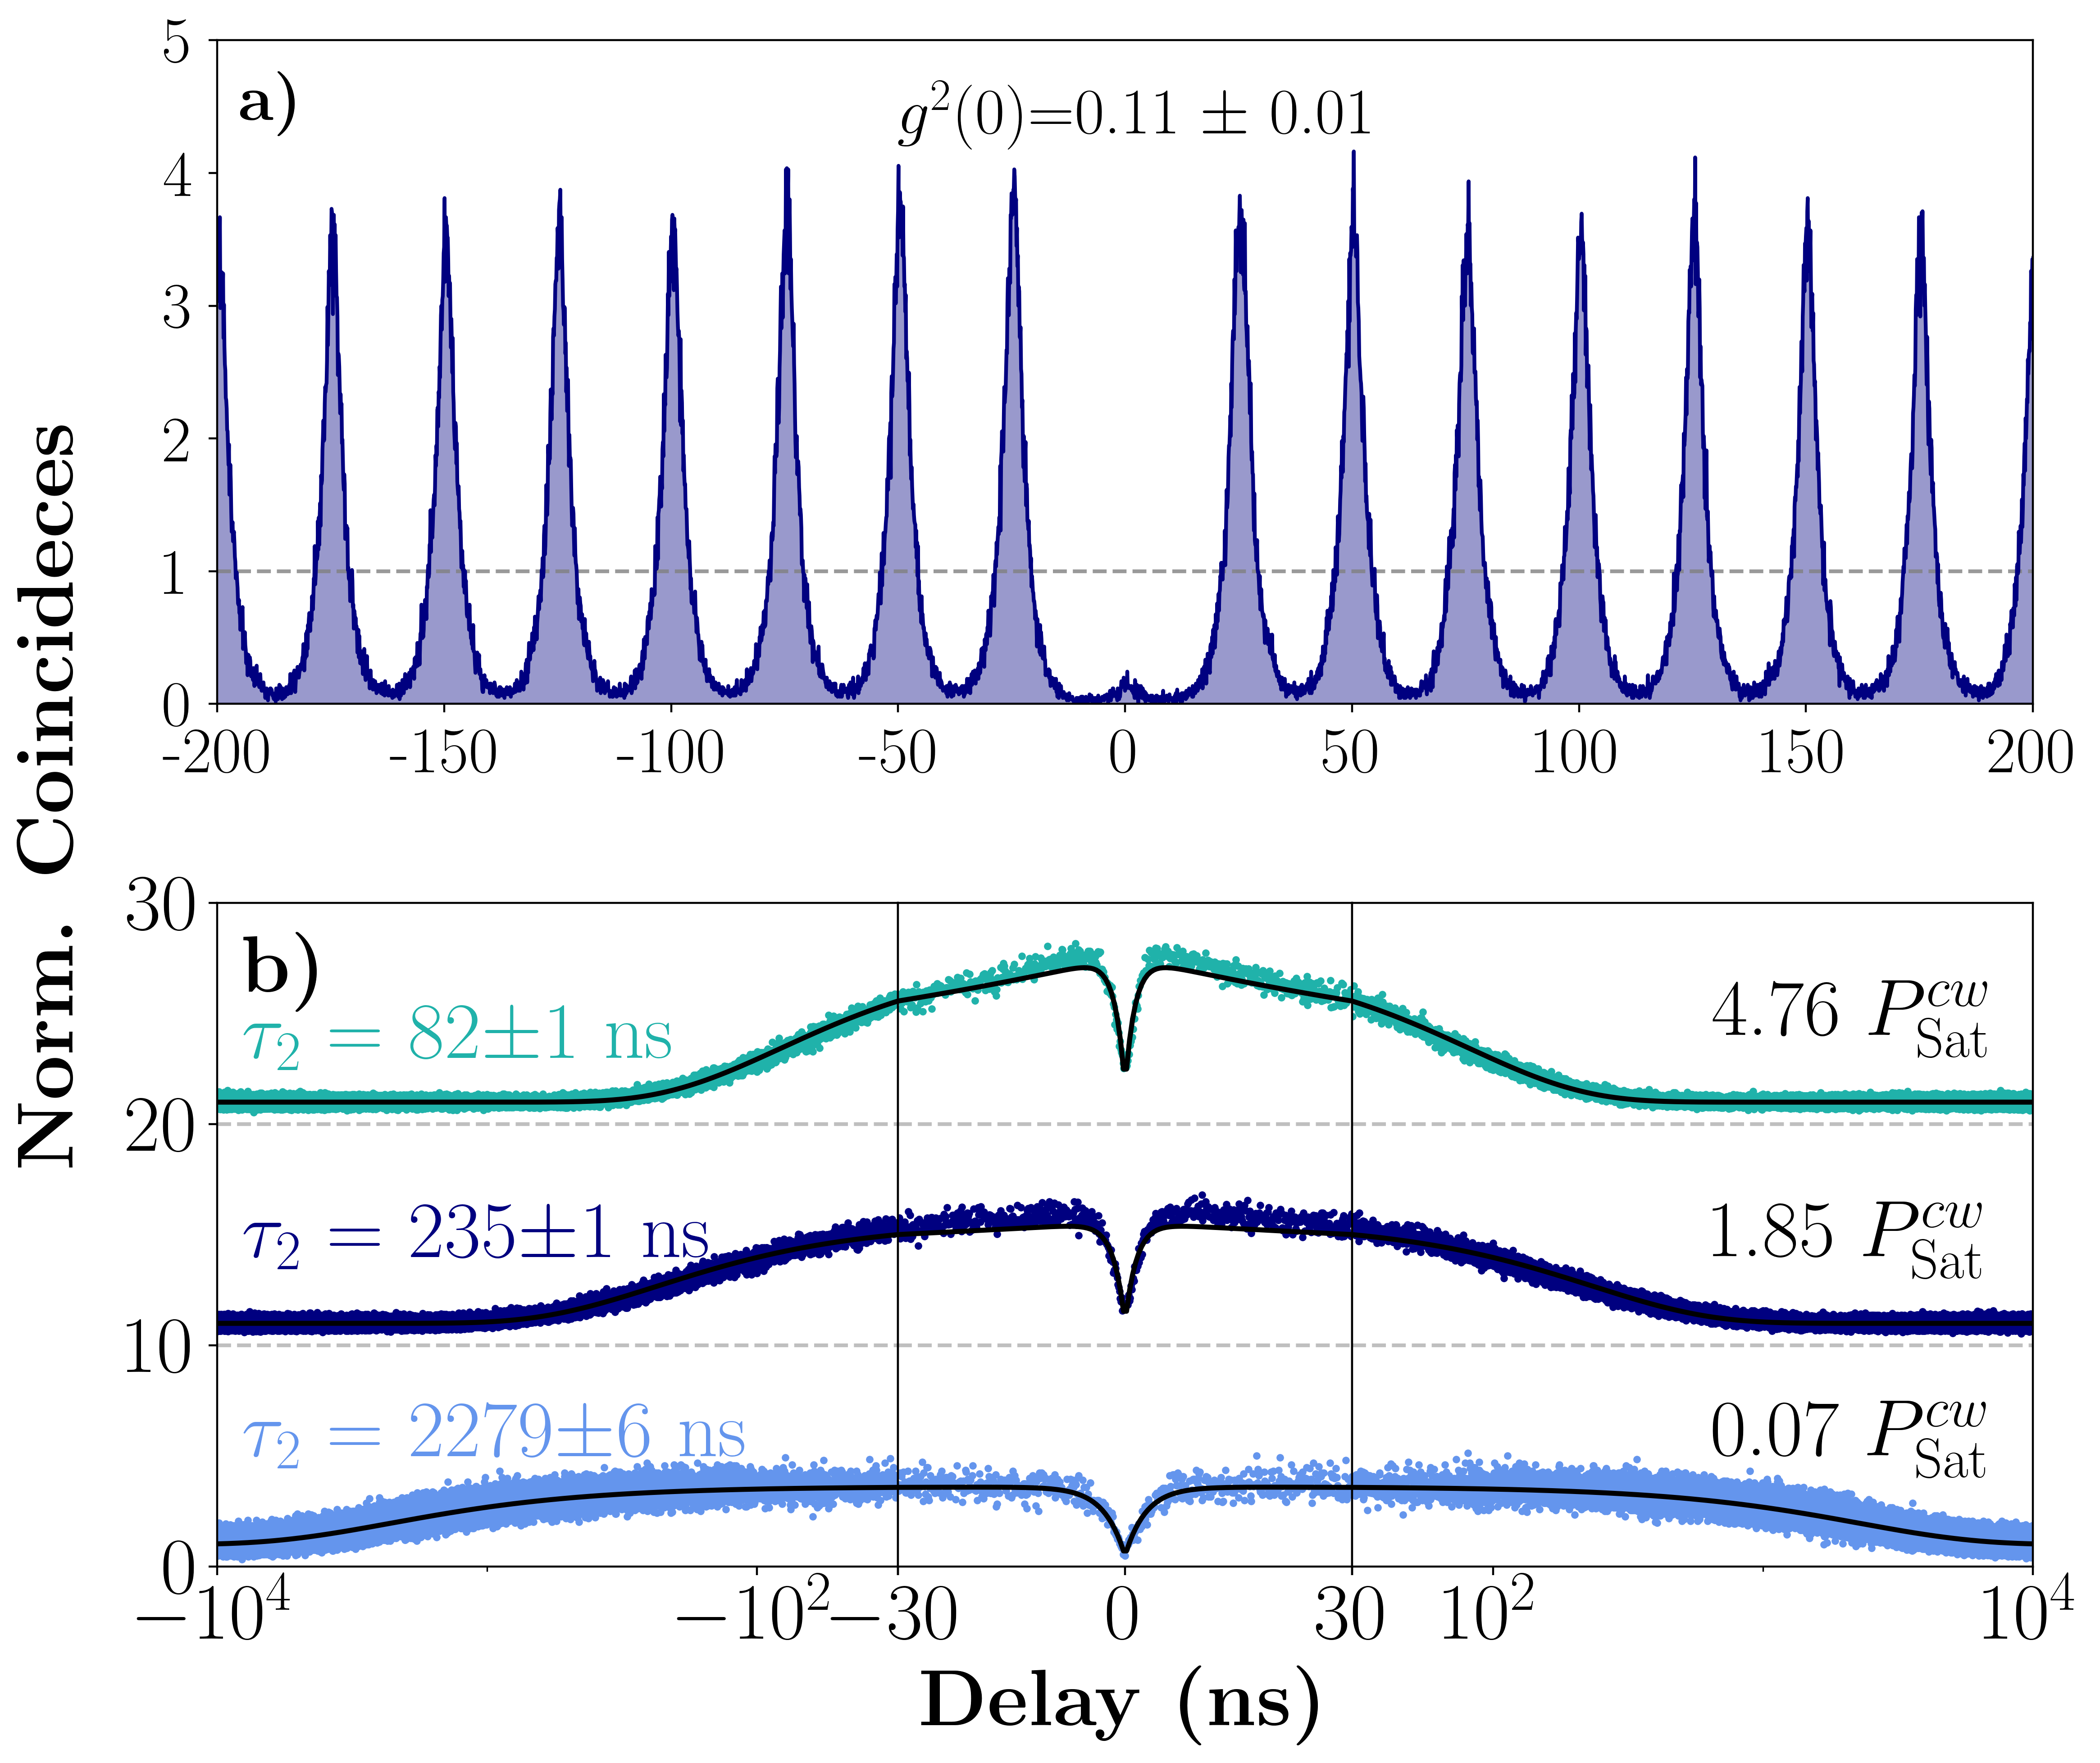

In [ ]:
from matplotlib.gridspec import GridSpec

# Create the full figure with 2 rows
fig = plt.figure(figsize=(13, 11), dpi=400)
gs = GridSpec(2, 3, height_ratios=[1, 1], width_ratios=[1.5, 1, 1.5], hspace=0.3, wspace=0.0)

# --- Pulsed g2---
ax_top = fig.add_subplot(gs[0, :])  # Use full width
if True: # To make it easier to read
  #PLotting params
  colour = 'navy'
  # ax_top.set_ylabel(r'\textbf{Norm. coincidences}', fontsize=font_size)
  ax_top.set_ylim(0, 5)
  ax_top.set_xlim(-175000, 175000)

  # PLot
  ax_top.axhline(1, linestyle='--', c="grey", alpha=0.8)
  ax_top.plot(delayp, correlationsp / 111, '-', c=colour, ms=2)
  ax_top.fill_between(delayp, correlationsp / 111, color=colour, alpha=0.4)
  ax_top.text(-50000, 4.3, r'$g^{2}(0) $' + f'={0.11} $\pm$ {0.01}', fontsize=font_size)

  # Edit ticks
  ax_top.tick_params(labelsize=font_size, pad=6)
  xticks = ax_top.get_xticks()
  ax_top.set_xticks(xticks)
  ax_top.set_xticklabels([round(x / 1000) for x in xticks])
  ax_top.text(-195000, 4.4, r'\textbf{a)}', fontsize=font_size)

# --- CW g2---
ax_left   = fig.add_subplot(gs[1, 0])
ax_center = fig.add_subplot(gs[1, 1], sharey=ax_left)
ax_right  = fig.add_subplot(gs[1, 2], sharey=ax_left)
axes = [ax_left, ax_center, ax_right]
t1_positions = [23, 14, 5]
if True: # Foe aesthetic reasons
  # Plotting params
  font_size = 32
  colours = ['lightseagreen','navy' ,'cornflowerblue' ]
  linear_range_ps = 3e4  # linear region in ps
  linear_range_ns = linear_range_ps / 1e3  # convert to ns for plotting
  min_max_delay_ps = 10e6 # Min-max range of plot
  min_max_delay_ns = min_max_delay_ps / 1e3
  height_scale = 9

  # PLot
  for i in range(3):
      delay_ps = delays[i]                   # delay for fitting (in ps)
      delay_ns = delay_ps / 1e3              # delay for plotting (in ns)
      coinc = coincidences[i]
      ax_left, ax_center, ax_right = axes

      # Fit full data range
      guess = [np.mean(coinc[:100]), -100, 100, 5_000, 5_000] # A, B, C, t0, t1
      bounds = ([0, -np.inf, 0, 0, 0], [1000, 0, np.inf, 5_000, 10_000_000])
      popt, erropt = optimize.curve_fit(bi_exp, delay_ps, coinc, p0=guess, bounds=bounds, maxfev=1e5, sigma = np.sqrt(coinc))
      current_t1 = popt[-1]
      current_t1_error = np.sqrt(erropt[-1][-1])
      # print('Power:', titles[i][:4],'t1:', popt[-1],'Error:', np.sqrt(erropt[-1][-1]))

      current_t1_Hz = 1/(2*np.pi*current_t1*1e-12) /1e3 # to kHz
      current_t1_error_Hz = current_t1_error * 1e-12/(2*np.pi*(current_t1*1e-12)**2) / 1e3 # to kHz

      print('Power:', titles[i][:4],'t1:', popt[-2],'Error:', np.sqrt(erropt[-2][-2]))


      # Normalize
      A_norm = popt[0]
      coinc_norm = coinc / A_norm

      # Masks for plotting in ns
      mask_left = delay_ns < -linear_range_ns
      mask_center = (delay_ns >= -linear_range_ns) & (delay_ns <= linear_range_ns)
      mask_right = delay_ns > linear_range_ns

      # Changing y-axis range
      ax_left.set_ylim(0, 30)
      ax_right.set_ylim(0, 30)
      ax_center.set_ylim(0, 30)

      # Left (log)
      if i == 0:
        ax_left.plot(delay_ns[mask_left], coinc_norm[mask_left]+height_scale*(2-i)+2, 'o', c=colours[i], ms=2)
      elif i == 1:
        ax_left.plot(delay_ns[mask_left], coinc_norm[mask_left]+height_scale*(2-i)+1, 'o', c=colours[i], ms=2)
      else:
        ax_left.plot(delay_ns[mask_left], coinc_norm[mask_left]+height_scale*(2-i), 'o', c=colours[i], ms=2)
      ax_left.set_xscale('symlog', linthresh=1e4 / 1e3)
      ax_left.set_xlim(-min_max_delay_ns, -linear_range_ns)
      ax_left.set_xticks([-min_max_delay_ns, -1e5 / 1e3, -linear_range_ns])
      ax_left.tick_params(labelsize=font_size)
      if i == 1:
          # ax_left.set_ylabel(r'\textbf{Norm. coincidences}', fontsize=font_size)
          pass

      # Center (linear)
      if i == 0:
        ax_center.plot(delay_ns[mask_center], coinc_norm[mask_center]+height_scale*(2-i)+2, 'o', c=colours[i], ms=2)
      elif i == 1:
        ax_center.plot(delay_ns[mask_center], coinc_norm[mask_center]+height_scale*(2-i)+1, 'o', c=colours[i], ms=2)
      else:
        ax_center.plot(delay_ns[mask_center], coinc_norm[mask_center]+height_scale*(2-i), 'o', c=colours[i], ms=2)
      ax_center.set_xlim(-linear_range_ns, linear_range_ns)
      ax_center.set_xticks([-linear_range_ns, 0, linear_range_ns])
      if i == 2:
          ax_center.set_xlabel(r"\textbf{Delay (ns)}", fontsize=font_size)
      ax_center.tick_params(left=False, labelleft=False, labelsize=font_size)

      # Right (log)
      if i == 0:
        ax_right.plot(delay_ns[mask_right], coinc_norm[mask_right]+height_scale*(2-i)+2, 'o', c=colours[i], ms=2)
      elif i == 1:
        ax_right.plot(delay_ns[mask_right], coinc_norm[mask_right]+height_scale*(2-i)+1, 'o', c=colours[i], ms=2)
      else:
        ax_right.plot(delay_ns[mask_right], coinc_norm[mask_right]+height_scale*(2-i), 'o', c=colours[i], ms=2)
      ax_right.set_xscale('symlog', linthresh=1e4 / 1e3)
      ax_right.set_xlim(linear_range_ns, min_max_delay_ns)
      ax_right.set_xticks([linear_range_ns, 1e5 / 1e3, min_max_delay_ns])
      ax_right.tick_params(left=False, labelleft=False, labelsize=font_size)
      if i == 0:
        ax_right.text(6.5e2,t1_positions[i]+1,titles[i], fontsize = font_size)
      if i == 1:
        ax_right.text(6.5e2,t1_positions[i],titles[i], fontsize = font_size)
      if i == 2:
        ax_right.text(6.5e2,t1_positions[i],titles[i], fontsize = font_size)

      # Generate fit curve (ps for fitting, convert to ns for plotting)
      delay_fit_ps = np.linspace(-min_max_delay_ps, min_max_delay_ps, 50000)
      delay_fit_ns = delay_fit_ps / 1e3
      coinc_fit = bi_exp(delay_fit_ps, *popt) / A_norm

      # Fit masks in ns
      mask_fit_left = delay_fit_ns < -linear_range_ns
      mask_fit_center = (delay_fit_ns >= -linear_range_ns) & (delay_fit_ns <= linear_range_ns)
      mask_fit_right = delay_fit_ns > linear_range_ns

      # Plot fit curves
      if i == 0:
        ax_left.plot(delay_fit_ns[mask_fit_left], coinc_fit[mask_fit_left]+height_scale*(2-i)+2, '-k', linewidth=2)
        ax_center.plot(delay_fit_ns[mask_fit_center], coinc_fit[mask_fit_center]+height_scale*(2-i)+2, '-k', linewidth=2)
        ax_right.plot(delay_fit_ns[mask_fit_right], coinc_fit[mask_fit_right]+height_scale*(2-i)+2, '-k', linewidth=2)
      elif i == 1:
        ax_left.plot(delay_fit_ns[mask_fit_left], coinc_fit[mask_fit_left]+height_scale*(2-i)+1, '-k', linewidth=2)
        ax_center.plot(delay_fit_ns[mask_fit_center], coinc_fit[mask_fit_center]+height_scale*(2-i)+1, '-k', linewidth=2)
        ax_right.plot(delay_fit_ns[mask_fit_right], coinc_fit[mask_fit_right]+height_scale*(2-i)+1, '-k', linewidth=2)
      else:
        ax_left.plot(delay_fit_ns[mask_fit_left], coinc_fit[mask_fit_left]+height_scale*(2-i), '-k', linewidth=2)
        ax_center.plot(delay_fit_ns[mask_fit_center], coinc_fit[mask_fit_center]+height_scale*(2-i), '-k', linewidth=2)
        ax_right.plot(delay_fit_ns[mask_fit_right], coinc_fit[mask_fit_right]+height_scale*(2-i), '-k', linewidth=2)
      # PLot text
      ax_left.text(-8e3, t1_positions[i], r'$\tau_2$ = ' + f'{int(np.ceil(current_t1/1e3))}' + r'$\pm$' + f'{int(np.ceil(current_t1_error/1e3))}'+r' ns', fontsize=font_size, c=colours[i])

  ax_left.text(-8e3, 26, r'\textbf{b)}', fontsize=font_size)
  ax_left.axhline(10, linestyle='--', c="grey", alpha=0.5)
  ax_left.axhline(20, linestyle='--', c="grey", alpha=0.5)
  ax_center.axhline(10, linestyle='--', c="grey", alpha=0.5)
  ax_center.axhline(20, linestyle='--', c="grey", alpha=0.5)
  ax_right.axhline(10, linestyle='--', c="grey", alpha=0.5)
  ax_right.axhline(20, linestyle='--', c="grey", alpha=0.5)
#Shared y-label
fig.text(0.04, 0.5, r'\textbf{Norm. Coincideces}', va='center', rotation='vertical', fontsize=font_size)

plt.show()




**ACS Photonics format**

In [ ]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "helvetica",
    "font.serif": ["helvetica"]
})

Power: 4.76 t1: 1309.8268072549126 Error: 30.89427988998766
Power: 1.85 t1: 1486.920671680156 Error: 37.70960242524795
Power: 0.07 t1: 2779.11650740777 Error: 101.33521845961566


<ipython-input-16-318f240e5f8f>:174: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig("Figure2PDF.pdf", format="pdf", bbox_inches='tight')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


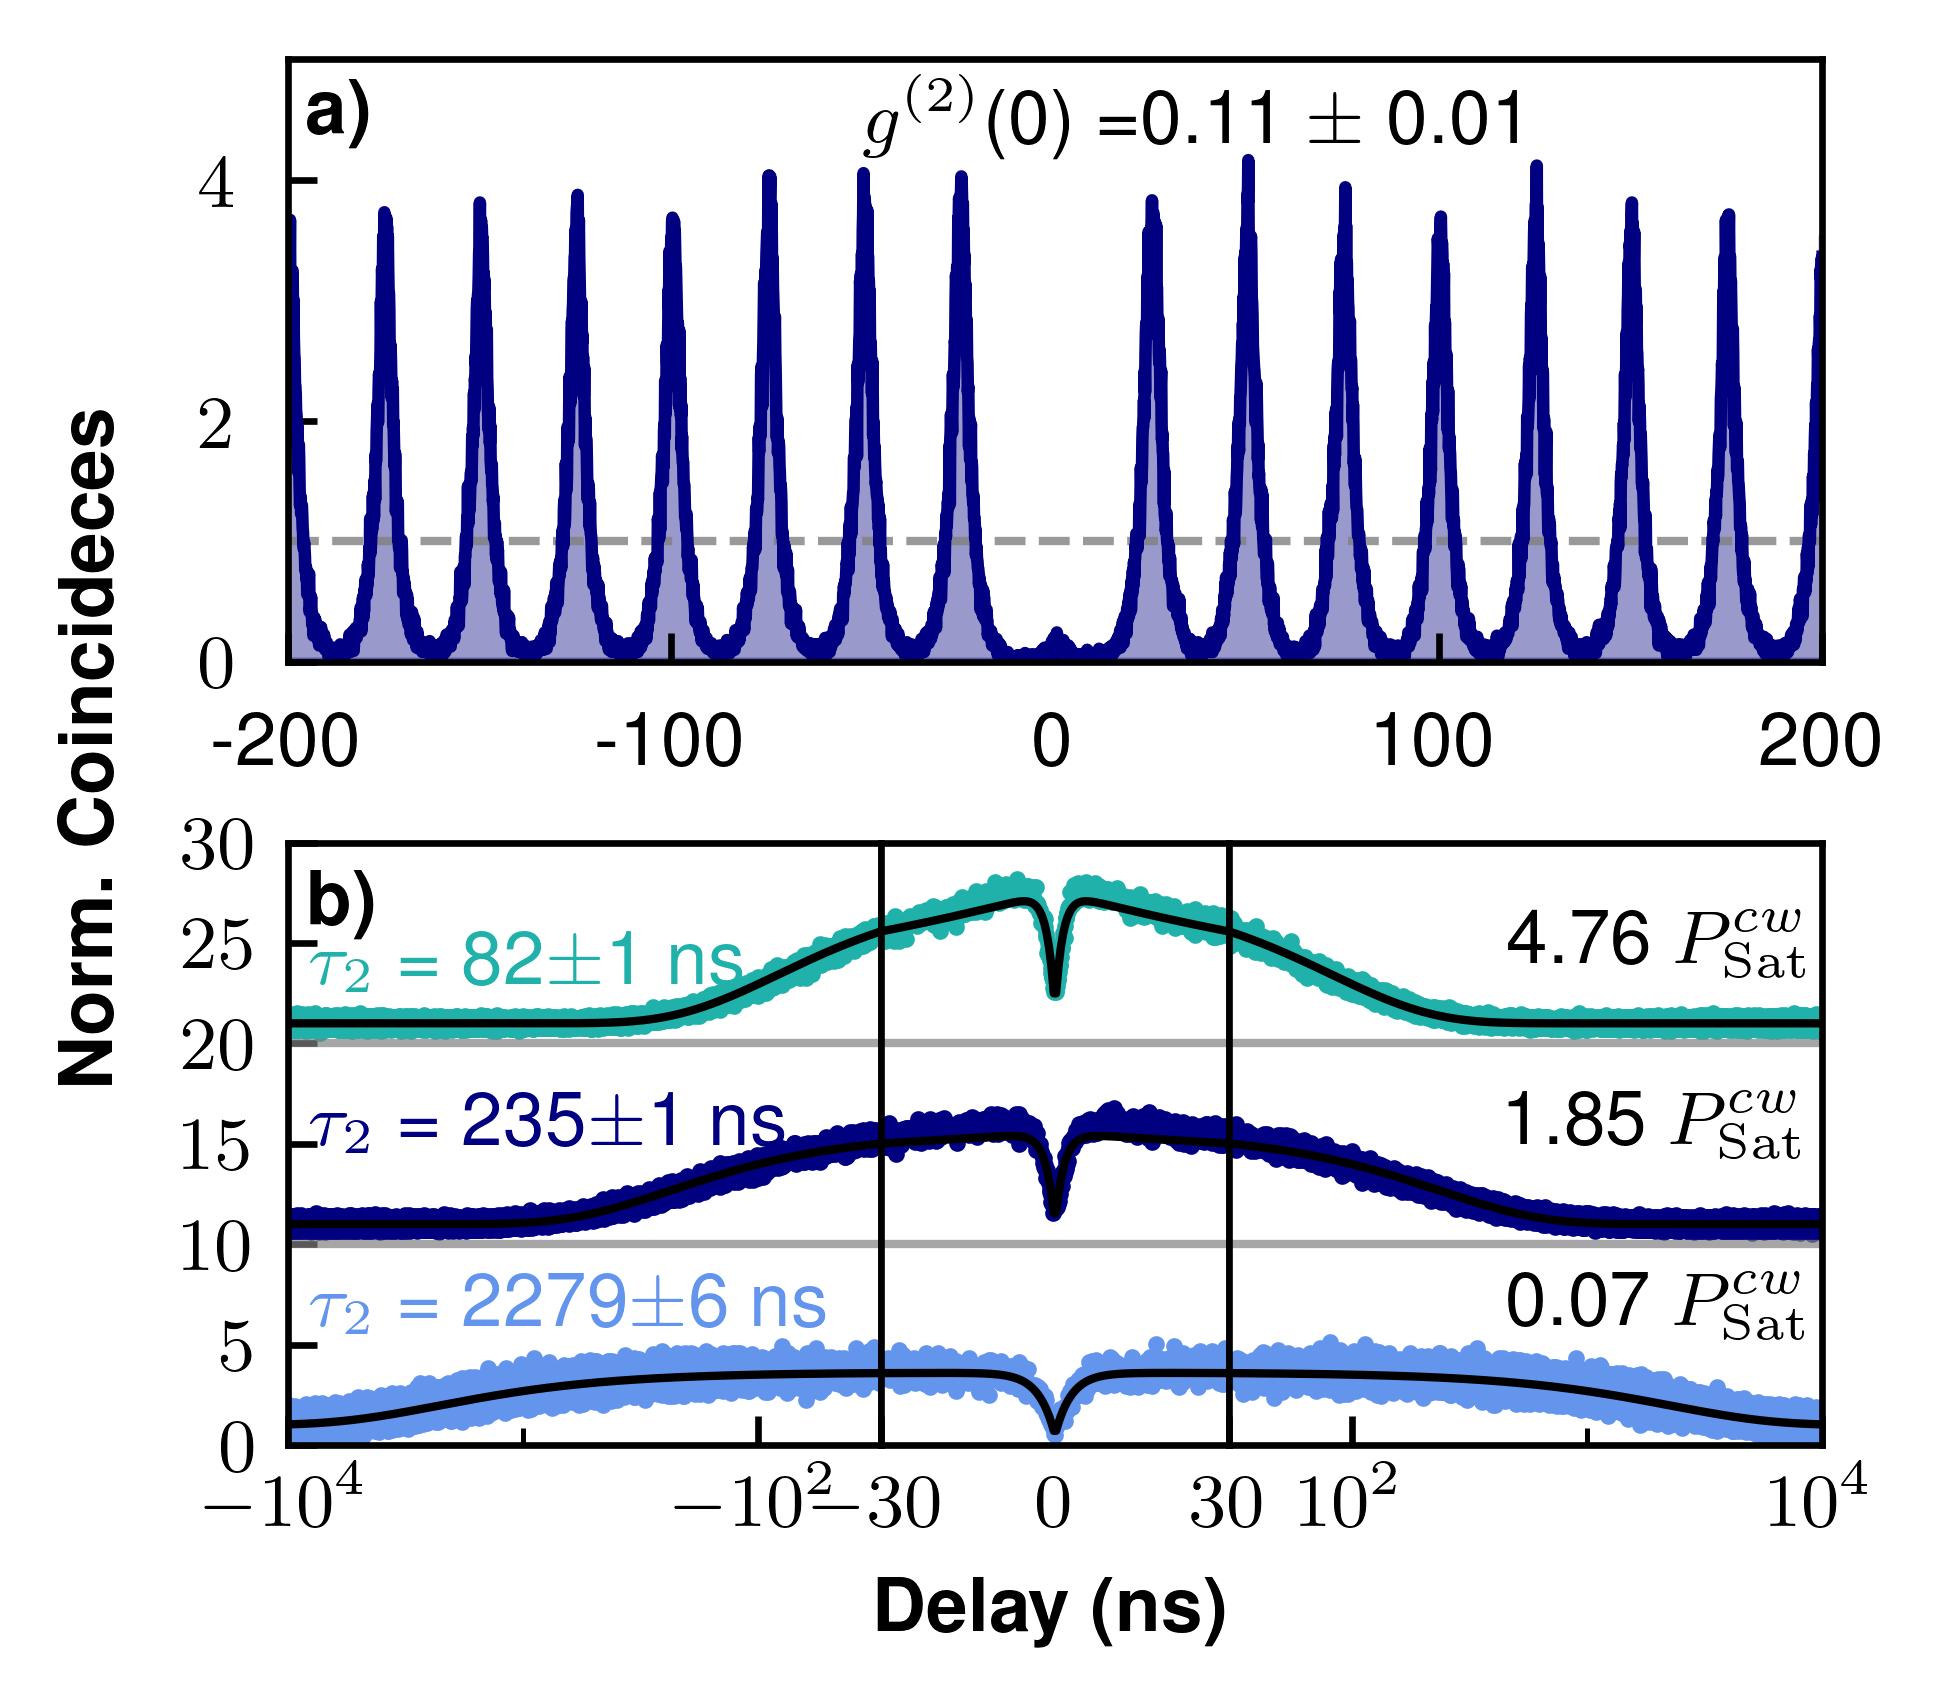

In [ ]:
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MaxNLocator


# Create the full figure with 2 rows
fig = plt.figure(figsize=(3.3, 3), dpi=600, constrained_layout=True)
gs = GridSpec(2, 3, height_ratios=[1, 1], width_ratios=[1.7, 1, 1.7], hspace=0.3, wspace=0.0)
font_size = 9
font_size_reduced = 9
line_width = 1
# --- Pulsed g2---
ax_top = fig.add_subplot(gs[0, :])  # Use full width
if True: # To make it easier to read
  #PLotting params
  colour = 'navy'
  # ax_top.set_ylabel(r'\textbf{Norm. coincidences}', fontsize=font_size)
  ax_top.set_ylim(0, 5)
  ax_top.set_xlim(-175000, 175000)

  # PLot
  ax_top.axhline(1, linestyle='--', c="grey", alpha=0.8, linewidth = line_width)
  ax_top.plot(delayp, correlationsp / 111, '-', c=colour, ms=2)
  ax_top.fill_between(delayp, correlationsp / 111, color=colour, alpha=0.4)
  ax_top.text(-50000, 4.3, r'$g^{(2)}$(0) ' + f'={0.11} $\pm$ {0.01}', fontsize=font_size)

  # Edit ticks
  ax_top.tick_params(labelsize=font_size_reduced, pad=6, direction = 'in')
  xticks = ax_top.get_xticks()
  ax_top.set_xticks(xticks)
  ax_top.set_xticklabels([round(x / 1000) for x in xticks])
  ax_top.text(-195000, 4.4, r'\textbf{a)}', fontsize=font_size)

# --- CW g2---
ax_left   = fig.add_subplot(gs[1, 0])
ax_center = fig.add_subplot(gs[1, 1], sharey=ax_left)
ax_right  = fig.add_subplot(gs[1, 2], sharey=ax_left)
axes = [ax_left, ax_center, ax_right]
t1_positions = [23, 15, 6]
if True: # Foe aesthetic reasons
  # Plotting params
  colours = ['lightseagreen','navy' ,'cornflowerblue' ]
  linear_range_ps = 3e4  # linear region in ps
  linear_range_ns = linear_range_ps / 1e3  # convert to ns for plotting
  min_max_delay_ps = 10e6 # Min-max range of plot
  min_max_delay_ns = min_max_delay_ps / 1e3
  height_scale = 9

  # PLot
  for i in range(3):
      delay_ps = delays[i]                   # delay for fitting (in ps)
      delay_ns = delay_ps / 1e3              # delay for plotting (in ns)
      coinc = coincidences[i]
      ax_left, ax_center, ax_right = axes

      # Fit full data range
      guess = [np.mean(coinc[:100]), -100, 100, 5_000, 5_000] # A, B, C, t0, t1
      bounds = ([0, -np.inf, 0, 0, 0], [1000, 0, np.inf, 5_000, 10_000_000])
      popt, erropt = optimize.curve_fit(bi_exp, delay_ps, coinc, p0=guess, bounds=bounds, maxfev=1e5, sigma = np.sqrt(coinc))
      current_t1 = popt[-1]
      current_t1_error = np.sqrt(erropt[-1][-1])
      # print('Power:', titles[i][:4],'t1:', popt[-1],'Error:', np.sqrt(erropt[-1][-1]))

      current_t1_Hz = 1/(2*np.pi*current_t1*1e-12) /1e3 # to kHz
      current_t1_error_Hz = current_t1_error * 1e-12/(2*np.pi*(current_t1*1e-12)**2) / 1e3 # to kHz

      print('Power:', titles[i][:4],'t1:', popt[-2],'Error:', np.sqrt(erropt[-2][-2]))


      # Normalize
      A_norm = popt[0]
      coinc_norm = coinc / A_norm

      # Masks for plotting in ns
      mask_left = delay_ns < -linear_range_ns
      mask_center = (delay_ns >= -linear_range_ns) & (delay_ns <= linear_range_ns)
      mask_right = delay_ns > linear_range_ns

      # Changing y-axis range
      ax_left.set_ylim(0, 30)
      ax_right.set_ylim(0, 30)
      ax_center.set_ylim(0, 30)

      #ax_left.yaxis.set_major_locator(MaxNLocator(nbins=4))
      ax_left.set_yticks(np.arange(0, 35, 5))

      # Left (log)
      dots_m_s = 1
      if i == 0:
        ax_left.plot(delay_ns[mask_left], coinc_norm[mask_left]+height_scale*(2-i)+2, 'o', c=colours[i], ms=dots_m_s)
      elif i == 1:
        ax_left.plot(delay_ns[mask_left], coinc_norm[mask_left]+height_scale*(2-i)+1, 'o', c=colours[i], ms=dots_m_s)
      else:
        ax_left.plot(delay_ns[mask_left], coinc_norm[mask_left]+height_scale*(2-i), 'o', c=colours[i], ms=dots_m_s)
      ax_left.set_xscale('symlog', linthresh=1e4 / 1e3)
      ax_left.set_xlim(-min_max_delay_ns, -linear_range_ns)
      ax_left.set_xticks([-min_max_delay_ns, -1e5 / 1e3, -linear_range_ns])
      ax_left.tick_params(labelsize=font_size, direction = 'in')
      ax_left.tick_params(left=False, labelleft=False, which='minor', direction='in')
      if i == 1:
          # ax_left.set_ylabel(r'\textbf{Norm. coincidences}', fontsize=font_size)
          pass

      # Center (linear)
      if i == 0:
        ax_center.plot(delay_ns[mask_center], coinc_norm[mask_center]+height_scale*(2-i)+2, 'o', c=colours[i], ms=dots_m_s)
      elif i == 1:
        ax_center.plot(delay_ns[mask_center], coinc_norm[mask_center]+height_scale*(2-i)+1, 'o', c=colours[i], ms=dots_m_s)
      else:
        ax_center.plot(delay_ns[mask_center], coinc_norm[mask_center]+height_scale*(2-i), 'o', c=colours[i], ms=dots_m_s)
      ax_center.set_xlim(-linear_range_ns, linear_range_ns)
      ax_center.set_xticks([-linear_range_ns, 0, linear_range_ns])
      if i == 2:
          ax_center.set_xlabel(r"\textbf{Delay (ns)}", fontsize=font_size)
      ax_center.tick_params(left=False, labelleft=False, labelsize=font_size, direction = 'in')
      ax_center.tick_params(left=False, labelleft=False, which='minor', direction='in')

      # Right (log)
      if i == 0:
        ax_right.plot(delay_ns[mask_right], coinc_norm[mask_right]+height_scale*(2-i)+2, 'o', c=colours[i], ms=dots_m_s)
      elif i == 1:
        ax_right.plot(delay_ns[mask_right], coinc_norm[mask_right]+height_scale*(2-i)+1, 'o', c=colours[i], ms=dots_m_s)
      else:
        ax_right.plot(delay_ns[mask_right], coinc_norm[mask_right]+height_scale*(2-i), 'o', c=colours[i], ms=dots_m_s)
      ax_right.set_xscale('symlog', linthresh=1e4 / 1e3)
      ax_right.set_xlim(linear_range_ns, min_max_delay_ns)
      ax_right.set_xticks([linear_range_ns, 1e5 / 1e3, min_max_delay_ns])
      ax_right.tick_params(left=False, labelleft=False, labelsize=font_size_reduced, direction = 'in')
      ax_right.tick_params(left=False, labelleft=False, which='minor', direction='in')
      x_pos_text = 4.6e2
      if i == 0:
        ax_right.text(x_pos_text,t1_positions[i]+1,titles[i], fontsize = font_size_reduced)
      if i == 1:
        ax_right.text(x_pos_text,t1_positions[i],titles[i], fontsize = font_size_reduced)
      if i == 2:
        ax_right.text(x_pos_text,t1_positions[i],titles[i], fontsize = font_size_reduced)

      # Generate fit curve (ps for fitting, convert to ns for plotting)
      delay_fit_ps = np.linspace(-min_max_delay_ps, min_max_delay_ps, 50000)
      delay_fit_ns = delay_fit_ps / 1e3
      coinc_fit = bi_exp(delay_fit_ps, *popt) / A_norm

      # Fit masks in ns
      mask_fit_left = delay_fit_ns < -linear_range_ns
      mask_fit_center = (delay_fit_ns >= -linear_range_ns) & (delay_fit_ns <= linear_range_ns)
      mask_fit_right = delay_fit_ns > linear_range_ns

      # Plot fit curves

      if i == 0:
        ax_left.plot(delay_fit_ns[mask_fit_left], coinc_fit[mask_fit_left]+height_scale*(2-i)+2, '-k', linewidth=line_width)
        ax_center.plot(delay_fit_ns[mask_fit_center], coinc_fit[mask_fit_center]+height_scale*(2-i)+2, '-k', linewidth=line_width)
        ax_right.plot(delay_fit_ns[mask_fit_right], coinc_fit[mask_fit_right]+height_scale*(2-i)+2, '-k', linewidth=line_width)
      elif i == 1:
        ax_left.plot(delay_fit_ns[mask_fit_left], coinc_fit[mask_fit_left]+height_scale*(2-i)+1, '-k', linewidth=line_width)
        ax_center.plot(delay_fit_ns[mask_fit_center], coinc_fit[mask_fit_center]+height_scale*(2-i)+1, '-k', linewidth=line_width)
        ax_right.plot(delay_fit_ns[mask_fit_right], coinc_fit[mask_fit_right]+height_scale*(2-i)+1, '-k', linewidth=line_width)
      else:
        ax_left.plot(delay_fit_ns[mask_fit_left], coinc_fit[mask_fit_left]+height_scale*(2-i), '-k', linewidth=line_width)
        ax_center.plot(delay_fit_ns[mask_fit_center], coinc_fit[mask_fit_center]+height_scale*(2-i), '-k', linewidth=line_width)
        ax_right.plot(delay_fit_ns[mask_fit_right], coinc_fit[mask_fit_right]+height_scale*(2-i), '-k', linewidth=line_width)
      # PLot text
      ax_left.text(-8e3, t1_positions[i], r'$\tau_2$ = ' + f'{int(np.ceil(current_t1/1e3))}' + r'$\pm$' + f'{int(np.ceil(current_t1_error/1e3))}'+r' ns', fontsize=font_size_reduced, c=colours[i])

  ax_left.text(-8e3, 26, r'\textbf{b)}', fontsize=font_size)
  ax_left.axhline(10, linestyle='-', c="grey", alpha=0.7, linewidth = line_width)
  ax_left.axhline(20, linestyle='-', c="grey", alpha=0.7, linewidth = line_width)
  ax_center.axhline(10, linestyle='-', c="grey", alpha=0.7, linewidth = line_width)
  ax_center.axhline(20, linestyle='-', c="grey", alpha=0.7, linewidth = line_width)
  ax_right.axhline(10, linestyle='-', c="grey", alpha=0.7, linewidth = line_width)
  ax_right.axhline(20, linestyle='-', c="grey", alpha=0.7, linewidth = line_width)
#Shared y-label
fig.text(0.01, 0.5, r'\textbf{Norm. Coincideces}', va='center', rotation='vertical', fontsize=font_size)

plt.savefig("Figure2PDF.pdf", format="pdf", bbox_inches='tight')
files.download("Figure2PDF.pdf")
plt.show()


#Compilation time

Power: 2.57 mW Popt: [   89.11121924  -528.03199775   587.7050358   1309.82680725
 81815.29511492]
Power: 1.00 mW Popt: [ 7.84694848e+01 -3.59991540e+02  3.58000353e+02  1.48692067e+03
  2.34393049e+05]
Power: 0.04 mW Popt: [ 2.47260922e+01 -7.72725902e+01  6.48085824e+01  2.77911651e+03
  2.27804401e+06]


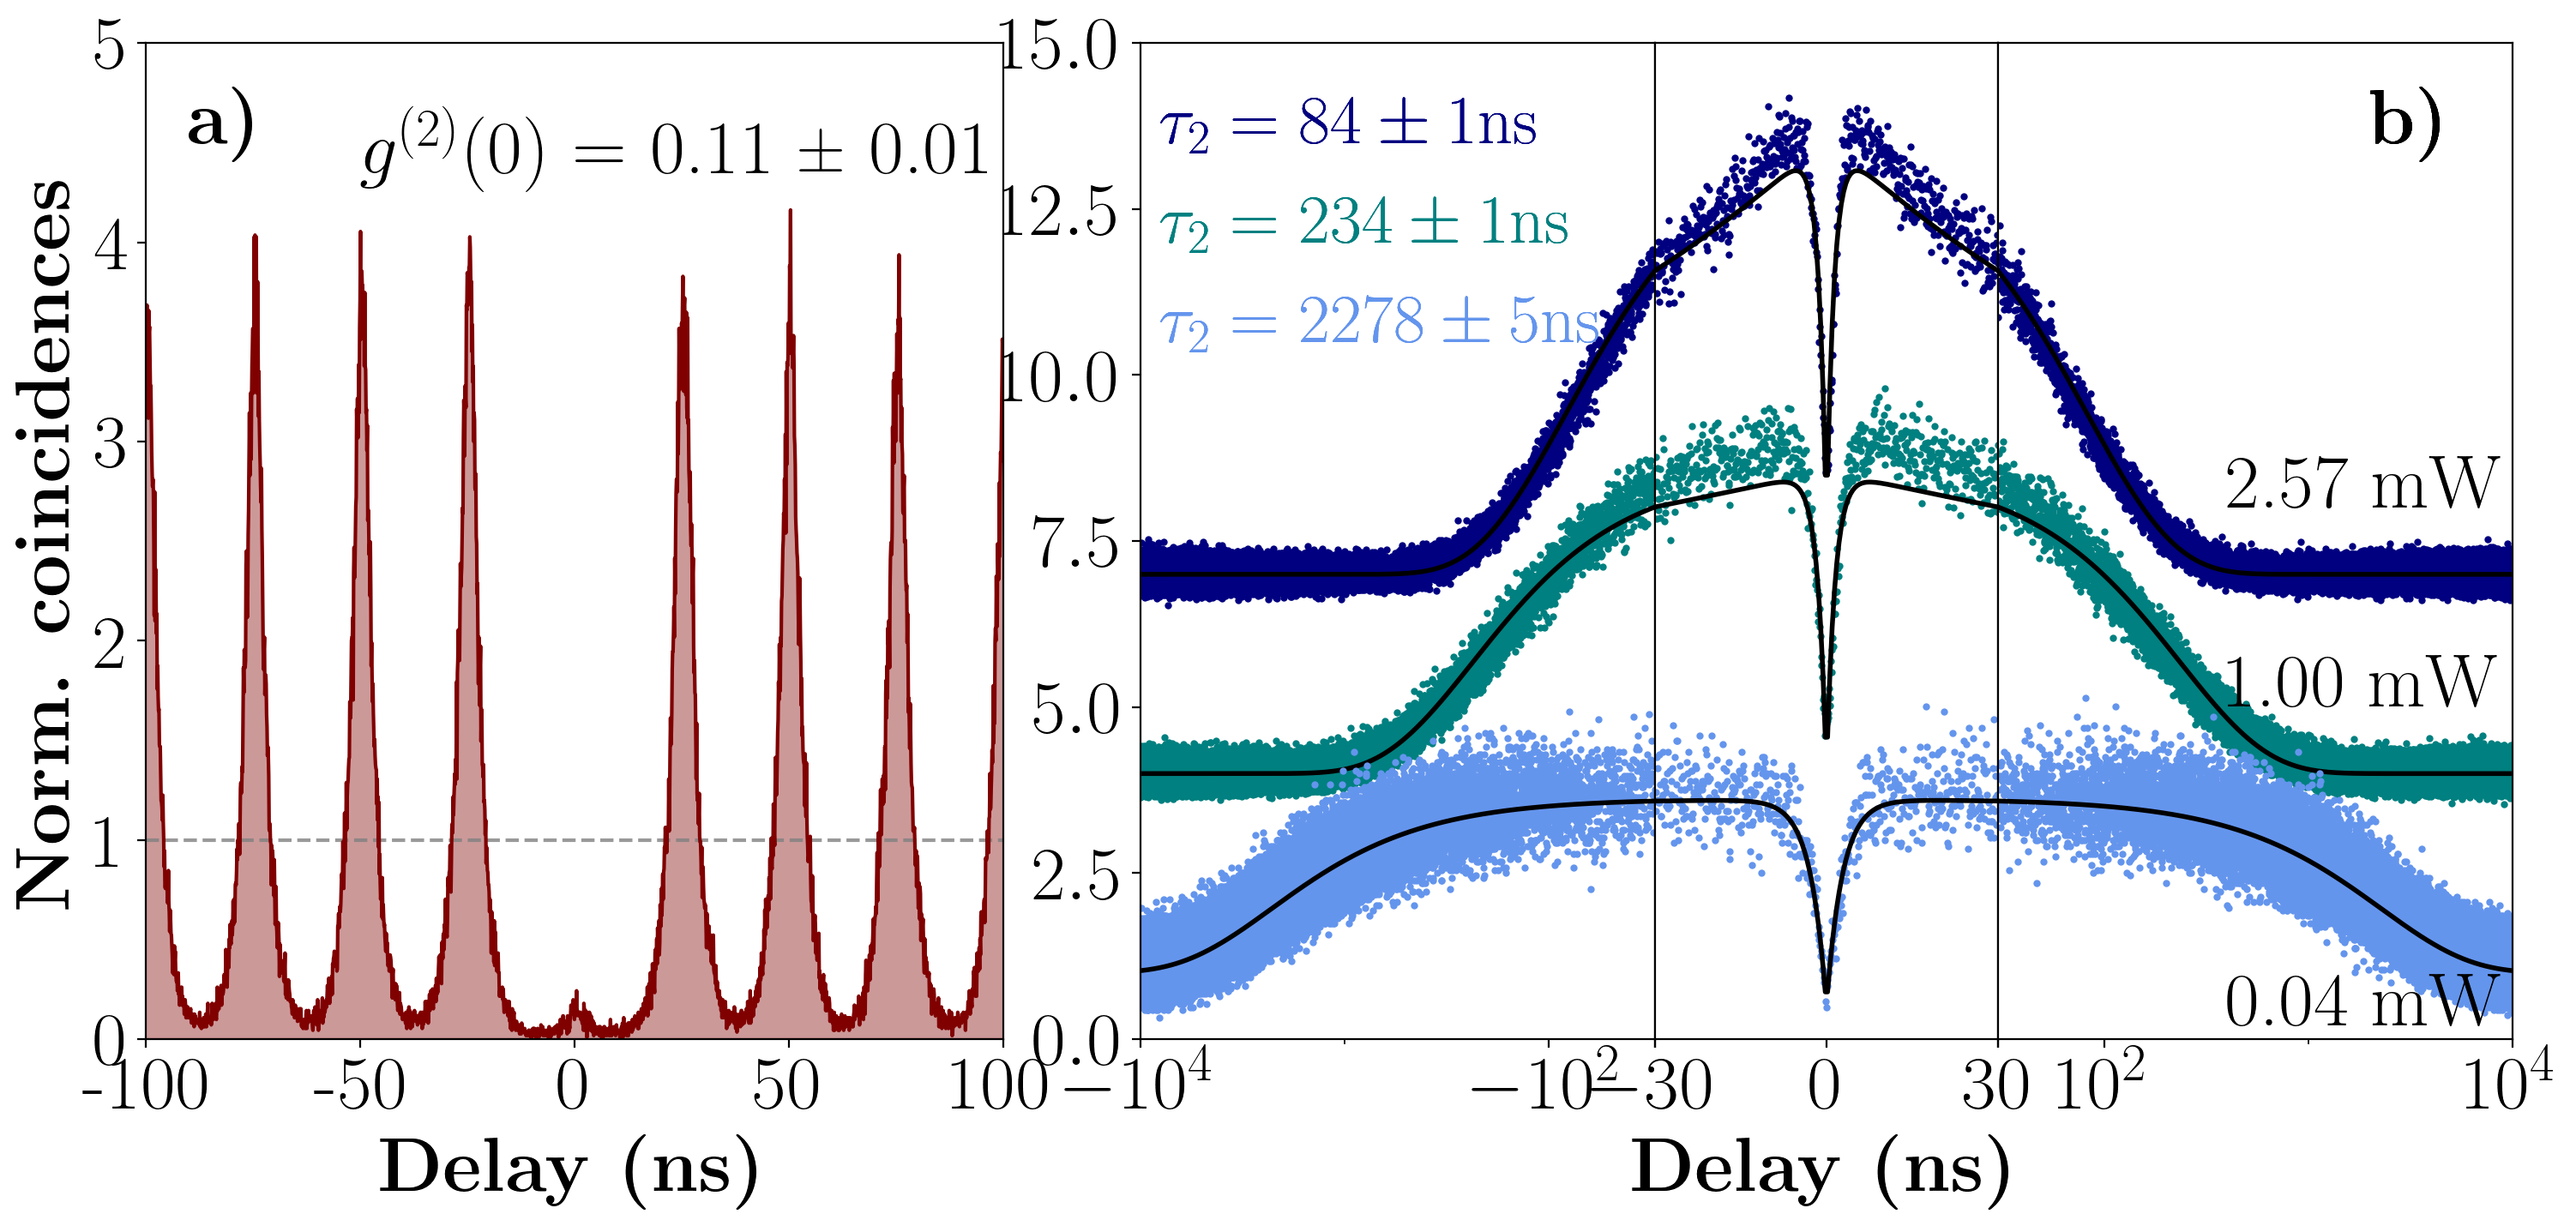

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure(figsize=(15, 7), dpi=200)

# GridSpec con 5 columnas: 3 para las subfiguras, 1 para espacio, 1 para la extra
gs = gridspec.GridSpec(1, 5, width_ratios=[2.5, 0.4, 1.5, 1, 1.5], wspace=0.0)

# Subplots principales (pegados entre sí)
ax_left   = fig.add_subplot(gs[2])
ax_center = fig.add_subplot(gs[3], sharey=ax_left)
ax_right  = fig.add_subplot(gs[4], sharey=ax_left)

# Subplot extra (independiente y bien separado)
ax_extra  = fig.add_subplot(gs[0])

axes = [ax_left, ax_center, ax_right]

fig.subplots_adjust(left=0.05, right=0.97, top=0.95, bottom=0.12)

# --- PLOTEO PRINCIPAL ---
for i in range(3):
    delay_ps = delays[i]
    delay_ns = delay_ps / 1e3
    coinc = coincidences[i]

    guess = [np.mean(coinc[:100]), -100, 100, 5_000, 5_000]
    bounds = ([0, -np.inf, 0, 0, 0], [1000, 0, np.inf, 5_000, 10_000_000])
    popt, erropt = optimize.curve_fit(bi_exp, delay_ps, coinc, p0=guess, bounds=bounds, maxfev=1e5, sigma = np.sqrt(coinc))
    print('Power:', titles[-(i+1)], 'Popt:', popt)

    A_norm = popt[0]
    coinc_norm = coinc / A_norm
    delay_fit_ps = np.linspace(-min_max_delay_ps, min_max_delay_ps, 50000)
    delay_fit_ns = delay_fit_ps / 1e3
    coinc_fit = bi_exp(delay_fit_ps, *popt) / A_norm

    mask_left = delay_ns < -linear_range_ns
    mask_center = (delay_ns >= -linear_range_ns) & (delay_ns <= linear_range_ns)
    mask_right = delay_ns > linear_range_ns
    mask_fit_left = delay_fit_ns < -linear_range_ns
    mask_fit_center = (delay_fit_ns >= -linear_range_ns) & (delay_fit_ns <= linear_range_ns)
    mask_fit_right = delay_fit_ns > linear_range_ns

    for ax in axes:
        ax.set_ylim(0, 15)

    ax_left.plot(delay_ns[mask_left], coinc_norm[mask_left]+3*(2-i), 'o', c=colours[i], ms=2)
    ax_left.plot(delay_fit_ns[mask_fit_left], coinc_fit[mask_fit_left]+3*(2-i), '-k', linewidth=2)
    ax_left.set_xscale('symlog', linthresh=1e4 / 1e3)
    ax_left.set_xlim(-min_max_delay_ns, -linear_range_ns)
    ax_left.set_xticks([-min_max_delay_ns, -1e5 / 1e3, -linear_range_ns])
    ax_left.tick_params(labelsize=font_size)
    ax_left.text(-8e3, 13.5, r'$\tau_2 = 84 \pm 1 $ns', fontsize=font_size-3, c=colours[0])
    ax_left.text(-8e3, 12, r'$\tau_2 = 234 \pm 1 $ns', fontsize=font_size-3, c=colours[1])
    ax_left.text(-8e3, 10.5, r'$\tau_2 = 2278 \pm 5 $ns ', fontsize=font_size-3, c=colours[2])

    #if i == 1:


    ax_center.plot(delay_ns[mask_center], coinc_norm[mask_center]+3*(2-i), 'o', c=colours[i], ms=2)
    ax_center.plot(delay_fit_ns[mask_fit_center], coinc_fit[mask_fit_center]+3*(2-i), '-k', linewidth=2)
    ax_center.set_xlim(-linear_range_ns, linear_range_ns)
    ax_center.set_xticks([-linear_range_ns, 0, linear_range_ns])
    if i == 2:
        ax_center.set_xlabel(r"\textbf{Delay (ns)}", fontsize=font_size)
    ax_center.tick_params(left=False, labelleft=False, labelsize=font_size)

    ax_right.plot(delay_ns[mask_right], coinc_norm[mask_right]+3*(2-i), 'o', c=colours[i], ms=2)
    ax_right.plot(delay_fit_ns[mask_fit_right], coinc_fit[mask_fit_right]+3*(2-i), '-k', linewidth=2)
    ax_right.set_xscale('symlog', linthresh=1e4 / 1e3)
    ax_right.set_xlim(linear_range_ns, min_max_delay_ns)
    ax_right.set_xticks([linear_range_ns, 1e5 / 1e3, min_max_delay_ns])
    ax_right.tick_params(left=False, labelleft=False, labelsize=font_size)
    ax_right.text(4e2, (0.2 if i == 2 else 2)+3*(2-i), titles[-(i+1)], fontsize=font_size)
    ax_right.text(2e3, 13.5, r'\textbf{b)}', fontsize=font_size)

# --- FIGURA EXTRA ---
ax_extra.axhline(1, linestyle='--', c="grey", alpha=0.8)
ax_extra.plot(delayp, correlationsp / 111, '-', c=colour, ms=2)
ax_extra.fill_between(delayp, correlationsp / 111, color=shade, alpha=0.4)
ax_extra.text(-50000, 4.35, r'$g^{(2)}(0)$ = ' + f'{0.11} ± {0.01}', fontsize=font_size)
ax_extra.set_xlabel(r'\textbf{Delay (ns)}', fontsize=font_size)
ax_extra.set_ylabel(r'\textbf{Norm. coincidences}', fontsize=font_size)
#ax_extra.set_ylabel(r'\textbf{Coincidences}' + '\n' + r'\textbf{(norm.)}', fontsize=font_size)
ax_extra.set_ylim(0, 5)
ax_extra.set_xlim(-71000, 71000)
ax_extra.tick_params(axis='both', labelsize=font_size)
xticks = ax_extra.get_xticks()
ax_extra.set_xticks(xticks)
ax_extra.set_xticklabels([str(int(x / 1000)) for x in xticks])  # ns → µs
ax_extra.text(-90000, 4.5, r'\textbf{a)}', fontsize=font_size)


plt.show()

In [ ]:
print(np.sqrt(12)/25.8)
print(erropt[0,0])

0.13426750446270366
0.001011778989071078
